In [1]:
import sys
!{sys.executable} -m pip install  pandas matplotlib descartes shapely geopandas

  Using cached pandas-1.2.3-cp39-cp39-macosx_10_9_x86_64.whl (10.7 MB)
  Using cached matplotlib-3.3.4-cp39-cp39-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached Shapely-1.7.1-cp39-cp39-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached pyproj-3.0.1-cp39-cp39-macosx_10_9_x86_64.whl (7.5 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached numpy-1.20.1-cp39-cp39-macosx_10_9_x86_64.whl (16.1 MB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached cligj-0.7.1-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-8.1.2-cp39-cp39-macosx_10_10_x86_6

In [3]:
# ./CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKGROUPS_POLY.shp
# ./CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKS_POLY.shp
# ./CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010TRACTS_POLY.shp


import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [4]:
print("hello")

hello


In [5]:
street_map = gpd.read_file("./CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKS_POLY.shp")

<AxesSubplot:>

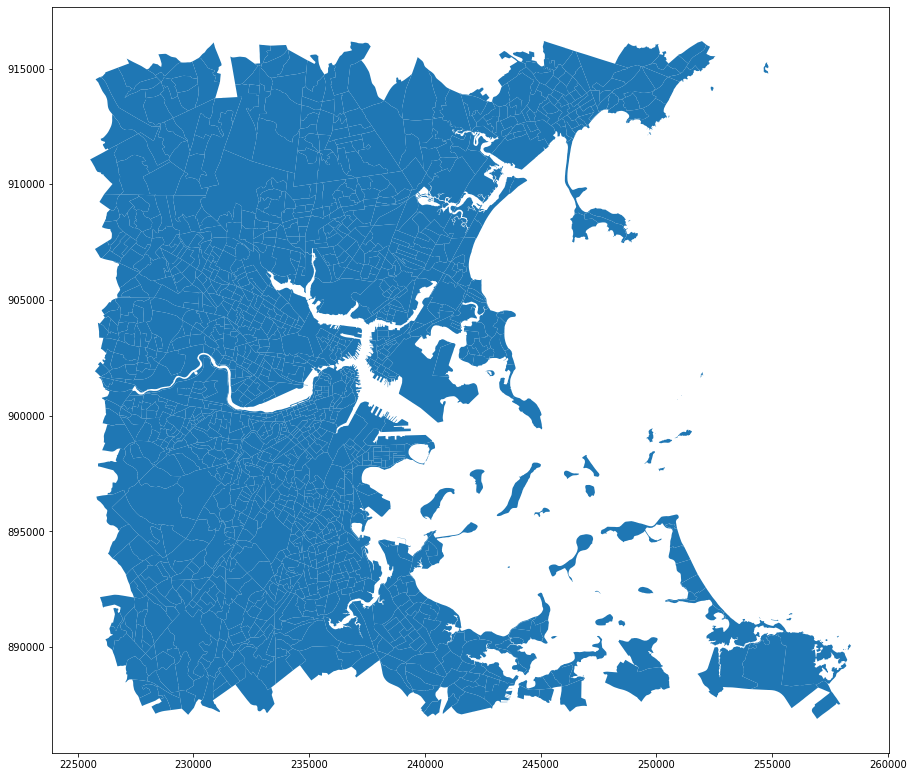

In [12]:
fig,ax = plt.subplots(figsize = (15,15))
# street_map.plot(ax=ax)
street_map = gpd.read_file("./census2010blockgroups/CENSUS2010BLOCKGROUPS_POLY.shp")
street_map.plot(ax=ax)

In [14]:
street_map.iloc[0]

STATEFP10                                                    25
COUNTYFP10                                                  021
TRACTCE10                                                417901
BLKGRPCE10                                                    1
GEOID10                                            250214179011
NAMELSAD10                                        Block Group 1
MTFCC10                                                   G5030
ALAND10                                                  511639
AWATER10                                                 425027
INTPTLAT10                                          +42.2470358
INTPTLON10                                         -070.9711185
AREA_SQFT                                            5522837.47
AREA_ACRES                                             126.7869
POP100_RE                                                  1489
HU100_RE                                                    764
LOGPL94171                              

In [15]:
df = pd.read_csv("./latlongs.csv")
crs= {'init': 'epsg:4326'}
df.head()

,Export Date,Id,Status,Priority,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Modified Date,Last Modified By,Time Open,Description,Comments,Finalized Date,QAlert Id (Do not edit),Address Number Filtered,LatLong
0,3/4/2021 18:50,12495708,Complete,5,321,Charger Ave,ALL-Street Cleaning,6/29/2020 10:41:49 AM,kimberly.wells@umb.edu,7/3/2020 4:31:51 PM,bguinasso@revere.org,4 days 5 hrs 50 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:51 PM,NaN,321,"(42.427141, -71.007056)"
1,3/4/2021 18:50,12510009,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/1/2020 5:00:00 AM,kimberly.wells@umb.edu,7/3/2020 4:31:55 PM,bguinasso@revere.org,2 days 11 hrs 31 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:55 PM,NaN,321,"(42.427141, -71.007056)"
2,3/4/2021 18:50,12632922,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/22/2020 5:00:00 AM,kimberly.wells@umb.edu,7/24/2020 12:10:42 PM,pargenzio@revere.org,2 days 7 hrs 10 mins,All hands on deck Citywide street cleaning,NaN,7/24/2020 12:10:42 PM,NaN,321,"(42.427141, -71.007056)"
3,3/4/2021 18:50,12785149,Complete,5,321,Charger Ave,ALL-Street Cleaning,8/12/2020 5:00:00 AM,kimberly.wells@umb.edu,8/12/2020 12:32:33 PM,pargenzio@revere.org,0 days 7 hrs 32 mins,All hands on deck Citywide street cleaning,NaN,8/12/2020 12:32:33 PM,NaN,321,"(42.427141, -71.007056)"
4,3/4/2021 18:50,12909944,Complete,5,321,Charger Ave,ALL-Street Cleaning,9/2/2020 5:00:00 AM,kimberly.wells@umb.edu,11/6/2020 2:15:29 PM,bguinasso@revere.org,65 days 9 hrs 15 mins,All hands on deck Citywide street cleaning,NaN,11/6/2020 2:15:29 PM,NaN,321,"(42.427141, -71.007056)"


In [ ]:
# now add the appropriate column
def getPoint(latlongs):
    tupe = eval(latlongs)
    return Point(tupe)

df['Lats'] = df.apply(lambda x: getPoint(x['LatLong']), axis=1)
df2['Longs'] = df2.apply(lambda x: getLatLong(1,x['LatLong']), axis=1)


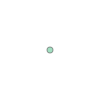

In [17]:
Point((3,4))